In [1]:
import source_synphot.passband
import source_synphot.io
import source_synphot.source
import astropy.table as at
from collections import OrderedDict
import pysynphot as S
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
%matplotlib notebook

import sys
sys.path.append('../Sigma_clip/')
import sigmacut

#from zp_fit import *
from scipy.optimize import minimize
from astropy.stats import sigma_clip
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
def myround(x, prec=2, base=.5):
    return round(base * round(float(x)/base),prec)

In [4]:
models = at.Table.read('ckmodels.txt',format='ascii')
logZ = 0.
model_sed_names = []
temp = []
for s in models:
    teff = max(3500.,s['teff'])
    logg = myround(s['logg'])
    # the models with logg < 1 are just padded with 0s
    if logg >= 1:
        temp.append(teff)
        modstring = 'ckmod{:.0f}_{:.1f}_{:.2f}'.format(teff,logZ, logg)
        model_sed_names.append(modstring)
model_sed = source_synphot.source.load_source(model_sed_names)

In [5]:
passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("Kep")]
pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
model = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, model)
pbnames = pbs.keys()

21.405741755339733
0.0
20.836195000114955
0.0
21.370261319386927
0.0
21.793287528964058
0.0
22.09903034378283
0.0
22.325516493196154
0.0


In [6]:
color1 = 'ps1g_ps1r'
color2 = 'ps1r_ps1i'
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
# construct color-color vectors
for modelname in model_sed:
    model= model_sed[modelname]
    model = S.ArraySpectrum(model.wave, model.flux, name=modelname)
    c1, c2 = color1.split('_')
    pb1, zp1 = pbs[c1]
    pb2, zp2 = pbs[c2]
    c3, c4 = color2.split('_')
    c5 = 'Kep'
    pb3, zp3 = pbs[c3]
    pb4, zp4 = pbs[c4]
    pb5, zp5 = pbs[c5]
    thiscol1 = source_synphot.passband.syncolor(model, pb1, pb2, zp1, zp2)
    thiscol2 = source_synphot.passband.syncolor(model, pb3, pb4, zp3, zp4)
    thiscol3 = source_synphot.passband.syncolor(model, pb5, pb3, zp5, zp3)
    thiscol4 = source_synphot.passband.syncolor(model, pb5, pb4, zp5, zp4)
    thiscol5 = source_synphot.passband.syncolor(model, pb1, pb5, zp1, zp5)
    col1.append(thiscol1)
    col2.append(thiscol2)
    col3.append(thiscol3)
    col4.append(thiscol4)
    col5.append(thiscol5)
col1 = np.array(col1)
col2 = np.array(col2)
col3 = np.array(col3)
col4 = np.array(col4)
col5 = np.array(col5)
# select only useful objects
good = ~np.isnan(col1)* ~np.isnan(col2)* ~np.isnan(col3)* ~np.isnan(col4)* ~np.isnan(col5)
good = np.array(good)

-43.46142641608394 -42.98333592355688
-42.98333592355688 -42.60947897282194
-43.06384874348639 -42.98333592355688
-43.06384874348639 -42.60947897282194
-43.46142641608394 -43.06384874348639
-43.42811488150393 -42.951515875740036
-42.951515875740036 -42.57774416616112
-43.03149532020911 -42.951515875740036
-43.03149532020911 -42.57774416616112
-43.42811488150393 -43.03149532020911
-43.39254864242051 -42.91768135862316
-42.91768135862316 -42.543554018019584
-42.996977934976044 -42.91768135862316
-42.996977934976044 -42.543554018019584
-43.39254864242051 -42.996977934976044
-43.353785389445065 -42.880558352350945
-42.880558352350945 -42.505428421999966
-42.95912953320057 -42.880558352350945
-42.95912953320057 -42.505428421999966
-43.353785389445065 -42.95912953320057
-43.31022613671858 -42.83852207668186
-42.83852207668186 -42.46180740425197
-42.91633937057923 -42.83852207668186
-42.91633937057923 -42.46180740425197
-43.31022613671858 -42.91633937057923
-43.26048351414385 -42.790246983238

-40.09251488361245 -40.07651607752499
-40.09251488361245 -39.868629184505025
-40.28318691137231 -40.09251488361245
-39.89888733732763 -39.76471789659353
-39.76471789659353 -39.60156257308034
-39.76703014065874 -39.76471789659353
-39.76703014065874 -39.60156257308034
-39.89888733732763 -39.76703014065874
-39.344889034001305 -39.36943025238401
-39.36943025238401 -39.29638214433993
-39.343793959191764 -39.36943025238401
-39.343793959191764 -39.29638214433993
-39.344889034001305 -39.343793959191764
-37.996950882345445 -38.437722033438334
-38.437722033438334 -38.56523842312828
-38.36535891682857 -38.437722033438334
-38.36535891682857 -38.56523842312828
-37.996950882345445 -38.36535891682857
-37.041836871944284 -37.75362225063052
-37.75362225063052 -37.98193650475916
-37.66562024015451 -37.75362225063052
-37.66562024015451 -37.98193650475916
-37.041836871944284 -37.66562024015451
-36.30623009893371 -37.187886170716304
-37.187886170716304 -37.49589104696214
-37.10615354417278 -37.187886170716

In [7]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = data.iloc[(data['ps_score'].values > 0.8) & (data['PDC'].values > 0)]
#cind =  ((data['campaign'].values == 16) & (data['Channel'].values == 70))
gb = data['gMeanPSFMag'].values
gbe = data['gMeanPSFMagErr'].values
rb = data['rMeanPSFMag'].values
rbe = data['rMeanPSFMagErr'].values
ib = data['iMeanPSFMag'].values
ibe = data['iMeanPSFMagErr'].values
kb = -2.5*np.log10(data['PDC'].values)
#Gain https://keplerscience.arc.nasa.gov/pipeline.html
kbe = 0.434 * np.abs(data['PDCe'].values/110) / np.abs(data['PDC'].values)

In [49]:

def Plotter(K,Colours,Compare,Channel, Residuals = False, Close = True):
    Params = Parms_dict(K)
    plt.figure(figsize=(10,6))
    plt.suptitle('Channel ' + str(Channel) + ', Zp = ' + str(np.round(K[0],3)) + 
                 '\n' + 'Ak ={}, Ag = {}, Ar = {}, Ai ={}'.format(np.round(Params['Ak'],3),
                                                                  np.round(Params['Ag'],3),
                                                                  np.round(Params['Ar'],3),
                                                                  np.round(Params['Ai'],3)))
    for i in range(len(Compare)):
        X,Y = Compare[i]
        keys = np.array(list(Colours.keys()))
        xind = 'mod ' + X == keys
        x = Colours[keys[xind][0]]
        yind = 'mod ' + Y == keys
        y = Colours[keys[yind][0]]

        x_interp = np.arange(np.nanmin(x),0.9,0.01)
        inter = interpolate.interp1d(x,y)
        l_interp = inter(x_interp)
        locus = np.array([x_interp,l_interp])
        # observed
        xind = 'obs ' + X == keys
        x = Colours[keys[xind][0]]
        yind = 'obs ' + Y == keys
        y = Colours[keys[yind][0]]
        #print(X,Y)
        c1,c2 = X.split('-')
        c3,c4 = Y.split('-')
        #print(c1,c2,c3,c4)

        # parameters
        ob_x = x.copy() 
        ob_x[0,:] += Params['A'+c1] - Params['A'+c2]
        if c1 == 'k': ob_x += Params['kzp']
        if c2 == 'k': ob_x -= Params['kzp']

        ob_y = y.copy() 
        ob_y[0,:] += Params['A'+c3] - Params['A'+c4]
        if c3 == 'k': ob_y[0,:] += Params['kzp']
        if c4 == 'k': ob_y[0,:] -= Params['kzp']

        ind = np.where((Colours['obs g-r'][0,:] <= .9) & (Colours['obs g-r'][0,:] >= 0.2))[0]
        ob_x = ob_x[:,ind]
        ob_y = ob_y[:,ind]
        
        
        plt.subplot(2,2,i+1)
        plt.xlabel(X)
        plt.ylabel(Y)
        if i == 2:
            if Residuals:
                dist = Dist_tensor(X,Y,Params,Colours,Tensor = True)
                
                plt.errorbar(ob_x[0,:],dist,ob_y[1,:],fmt='.',alpha=0.4,label='Observed')
                plt.axhline(0,ls='--',color='k',label='Model')
                plt.legend(loc='upper center', bbox_to_anchor=(1.5, .5))
                plt.ylim(-.6, .6)
            else:
                plt.errorbar(ob_x[0,:],ob_y[0,:],ob_y[1,:],fmt='.',alpha=0.4,label='Observed')
                plt.plot(locus[0,:],locus[1,:],label='Model')
                plt.legend(loc='upper center', bbox_to_anchor=(1.5, .5))
                plt.xlim(-0.5, 1)
                plt.ylim(-.5, 1)
        else:
            if Residuals:
                dist = Dist_tensor(X,Y,Params,Colours,Tensor = True)
                plt.axhline(0,ls='--',color='k')
                plt.errorbar(ob_x[0,:],dist,ob_y[1,:],fmt='.',alpha=0.4)
                #plt.ylim(-.6, .6)
            else:
                plt.errorbar(ob_x[0,:],ob_y[0,:],ob_y[1,:],fmt='.',alpha=0.4)
                plt.plot(locus[0,:],locus[1,:])
                plt.xlim(-0.5, 1)
                plt.ylim(-.5, 1)
    plt.subplots_adjust(wspace=.25,hspace=.2)
    if Residuals:
        plt.savefig('./figs/Fit_channel_' + str(Channel) + '_residual.png')
    else:
        plt.savefig('./figs/Fit_channel_' + str(Channel) + '.png')
    if Close:
        plt.close()
    
def Dot_prod_error(x,y,Model):
    """
    Calculate the error projection in the direction of a selected point.
    """
    #print(Model.shape)
    adj = y[0,:] - Model[1,:]
    op = x[0,:] - Model[0,:]
    #print(adj.shape,op.shape)
    hyp = np.sqrt(adj**2 + op**2)
    costheta = adj / hyp
    yerr_proj = abs(y[1,:] * costheta)
    xerr_proj = abs(x[1,:] * costheta)
    
    proj_err = yerr_proj + xerr_proj
    #print(proj_err)
    return proj_err    
    
def Dist_tensor(X,Y,Params,Colours,Tensor=False,Plot = False):
    keys = np.array(list(Colours.keys()))
    xind = 'mod ' + X == keys
    x = Colours[keys[xind][0]]
    yind = 'mod ' + Y == keys
    y = Colours[keys[yind][0]]
    
    x_interp = np.arange(np.nanmin(x),0.9,0.01)
    inter = interpolate.interp1d(x,y)
    l_interp = inter(x_interp)
    locus = np.array([x_interp,l_interp])
    # observed
    xind = 'obs ' + X == keys
    x = Colours[keys[xind][0]]
    yind = 'obs ' + Y == keys
    y = Colours[keys[yind][0]]
    #print(X,Y)
    c1,c2 = X.split('-')
    c3,c4 = Y.split('-')
    #print(c1,c2,c3,c4)
    

    # parameters
    ob_x = x.copy() 
    ob_y = y.copy() 
    indo = np.where((Colours['obs g-r'][0,:] <= .9) & (Colours['obs g-r'][0,:] >= 0.2))
    
    ob_x[0,:] += Params['A'+c1] - Params['A'+c2]
    if c1 == 'k': ob_x[0,:] += Params['kzp']
    if c2 == 'k': ob_x[0,:] -= Params['kzp']

    
    ob_y[0,:] += Params['A'+c3] - Params['A'+c4]
    if c3 == 'k': ob_y[0,:] += Params['kzp']
    if c4 == 'k': ob_y[0,:] -= Params['kzp']
    
    ind = np.where((Colours['obs g-r'][0,:] <= .9) & (Colours['obs g-r'][0,:] >= 0.2))[0]
    ob_x = ob_x[:,ind]
    ob_y = ob_y[:,ind]
    
    
    if Plot:
        plt.figure()
        plt.title(X + ' ' + Y)
        plt.plot(ob_x[0,:],ob_y[0,:],'.')
        plt.plot(locus[0,:],locus[1,:])
    #print(ob_x.shape)
    dist_tensor = []
    dt = []
    #print(Y + ' ', ob_y.shape[1])
    for i in range(ob_y.shape[1]):
        dist = np.sqrt((ob_x[0,i] - locus[0,:])**2 + (ob_y[0,i] - locus[1,:])**2) 
        dt += [dist]
        dist_tensor += [dist/ ob_y[1,i]]
        
    
    dist_tensor = np.array(dist_tensor)
    dt = np.array(dt)
    #print(X + Y +' dist ',dist_tensor.shape)
    if len(dist_tensor) > 0:
        minind = np.nanargmin(abs(dist_tensor),axis=1)

        proj_err = Dot_prod_error(ob_x,ob_y,locus[:,minind])
        mindist = np.nanmin(abs(dist_tensor),axis=1)
        if Tensor:
            
            eh = []
            for i in range(len(dist_tensor)):
                ind = np.where(np.nanmin(abs(dist_tensor[i,:])) == abs(dist_tensor[i,:]))[0]
                sign = (ob_y[0,i] - locus[1,ind]) / (abs(ob_y[0,i] - locus[1,ind]))
                eh += [dist_tensor[i,ind] * sign]
            eh = np.array(eh)
            
            return eh#np.nanmin(abs(dt),axis=1)
        if len(mindist) > 0:
            residual = np.nansum(mindist) #/ proj_err)
        else:
            #print('infs')
            residual = np.inf
    else:
        if Tensor:
            return []
        residual = np.inf
        #residual += 100*np.sum(np.isnan(dist))
    #print(residual)
    cut_points = len(indo) - len(ind)
    return residual + cut_points * 100



import copy
def Get_lcs(X,Y,Params,Colours):
    keys = np.array(list(Colours.keys()))

    xind = 'mod ' + X == keys
    x = Colours[keys[xind][0]]
    yind = 'mod ' + Y == keys
    y = Colours[keys[yind][0]]

    x_interp = np.arange(np.nanmin(x),0.9,0.01)
    inter = interpolate.interp1d(x,y)
    l_interp = inter(x_interp)
    locus = np.array([x_interp,l_interp])

    xind = 'obs ' + X == keys
    x = Colours[keys[xind][0]]
    yind = 'obs ' + Y == keys
    y = Colours[keys[yind][0]]
    c1,c2 = X.split('-')
    c3,c4 = Y.split('-')
    # parameters
    ob_x = x.copy() 
    ob_y = y.copy() 

    ob_x[0,:] += Params['A'+c1] - Params['A'+c2]
    if c1 == 'k': ob_x[0,:] += Params['kzp']
    if c2 == 'k': ob_x[0,:] -= Params['kzp']


    ob_y[0,:] += Params['A'+c3] - Params['A'+c4]
    if c3 == 'k': ob_y[0,:] += Params['kzp']
    if c4 == 'k': ob_y[0,:] -= Params['kzp']
    return ob_x, ob_y, locus

def sigma_mask(data,error= None,sigma=3,Verbose= False):
    if type(error) == type(None):
        error = np.zeros(len(data))
    
    calcaverage = sigmacut.calcaverageclass()
    calcaverage.calcaverage_sigmacutloop(data,noise=error,verbose=3,Nsigma=sigma
                                         ,median_firstiteration=True,saveused=True)
    if Verbose:
        print("mean:%f (uncertainty:%f)" % (calcaverage.mean,calcaverage.mean_err))
    return calcaverage.use


def Cut_data(K,Colours,Compare,Plot=False):
    Params = Parms_dict(K)
    c_cut = copy.deepcopy(Colours)
    #for X,Y in Compare:
    X = 'g-r'
    Y = 'k-r'
    dist = Dist_tensor(X,Y,Params,Colours,True)
    if len(dist) > 0:

        ob_x, ob_y, locus = Get_lcs(X,Y,Params,Colours)
        ob_x2, ob_y2, locus = Get_lcs(X,Y,Params,Colours)
        ind = np.where((Colours['obs g-r'][0,:] <= .9) & (Colours['obs g-r'][0,:] >= 0.2))[0]

        #if X == 'g-r':
        #    ind = np.where((ob_x[0,:] <= .9) & (ob_x[0,:] >= 0.2) & (ob_y[1,:] < 0.5))[0]
        #elif X == 'r-i':
        #    ind = np.where((ob_x[0,:] <= .6) & (ob_x[0,:] >= 0) & (ob_y[1,:] < 0.5))[0]
        ob_x = ob_x[:,ind]
        ob_y = ob_y[:,ind]
        

        #bad = []
        bad = sigma_mask(dist.flatten(),error=ob_y[1])
        #for i in range(len(dist)):
            #print(dist[i],ob_y[1,i])
         #   if abs(dist[i]) > 1:
                #print(dist,ob_y[0,i])
          #      bad += [i]
          #  if abs(dist[i]) > 10*ob_y[1,i]:

           #     bad += [i]
        if Plot:
            plt.figure()
            plt.errorbar(ob_x2[0,:],ob_y2[0,:],yerr = ob_y2[1,:],fmt='.')
            plt.errorbar(locus[0,:],locus[1,:])
            plt.errorbar(ob_x[0,bad],ob_y[0,bad],yerr = ob_y[1,bad],fmt='.')
            plt.errorbar(ob_x2[0,ind[bad]],ob_y2[0,ind[bad]],yerr = ob_y2[1,ind[bad]],fmt='.')
            #plt.xlim(.5,0.9)

        for key in keys:
            if 'obs' in key:
                #print(dist[bad],6*c_cut[key][1, main_ind[bad]])
                c_cut[key][:, ind[bad]] = np.nan
                #print('killed ', key)
        #print(colours[keys[xind][0]][:, main_ind[bad]])
    return c_cut

def Parms_dict(K):
    num = len(K)
    
    k =np.zeros(5)
    if num ==1:
        k[0] = K[0]
        k[1:] = 0
    else:
        k = K
    Params = {}
    Params['kzp'] = k[0]
    Params['Ak'] = k[1]
    Params['Ag'] = k[2]
    Params['Ar'] = k[3]
    Params['Ai'] = k[4]
    
    return Params

def SLR_fit_multi(K,Colours,Compare,Second=False):
    
    params = Parms_dict(K)
    res = 0
    #print(K)
    for x,y in Compare:
        res += Dist_tensor(x,y,params,Colours,Second)
    #print('residual ', res)
    return res
    

<IPython.core.display.Javascript object>


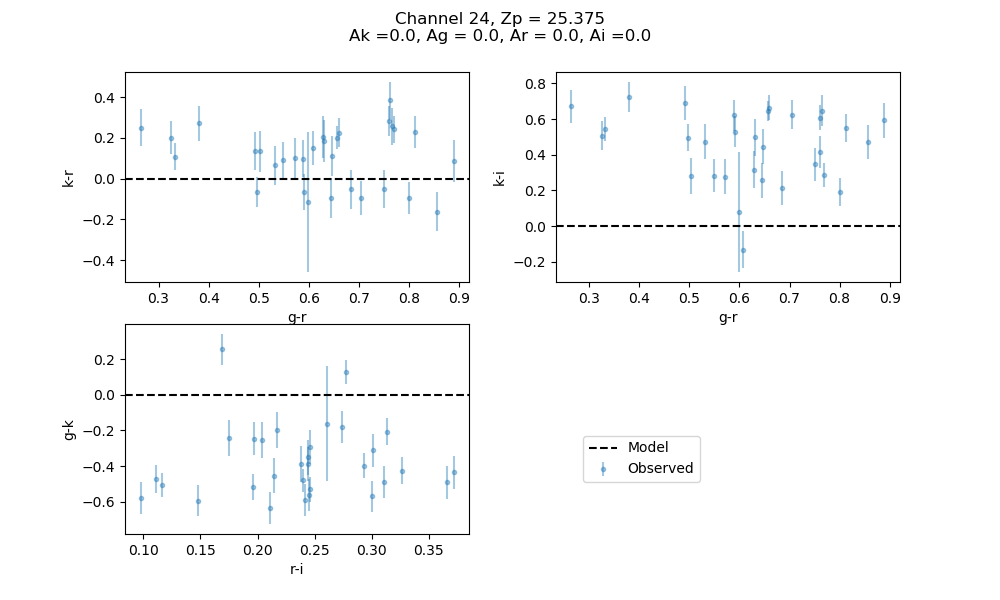

tensor  31
eh  31
x  (2, 31)  y  (2, 31)  dist  31
tensor  31
eh  31
x  (2, 31)  y  (2, 31)  dist  31
tensor  31
eh  31
x  (2, 31)  y  (2, 31)  dist  31


In [1121]:
Plotter([np.nanmean(samples)],c, compare,24,Close=False,Residuals=True)

i:00 mean:-5.454693(5.782315) stdev:41.696868 X2norm:0.000000 Nchanged:0 Nused:53 Nskipped:0
 mean: None  mean_err: None  stdev: None  Nchanged: 52  Nused: 1  Nskipped: 52
ERROR


<IPython.core.display.Javascript object>


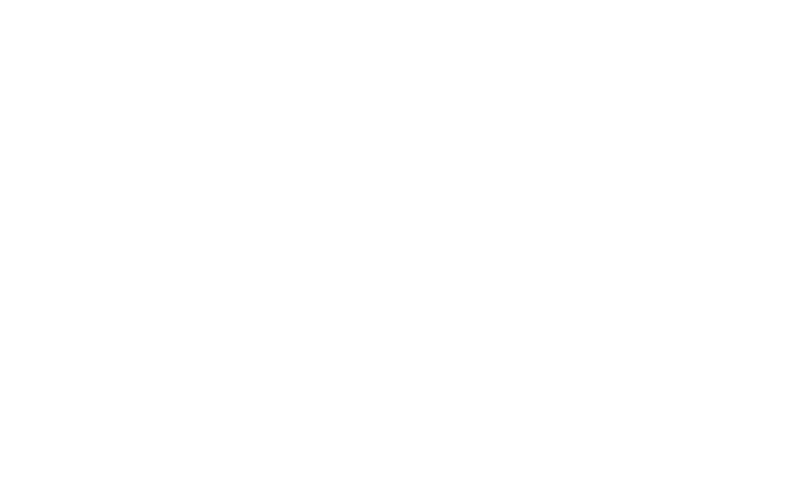

<IPython.core.display.Javascript object>


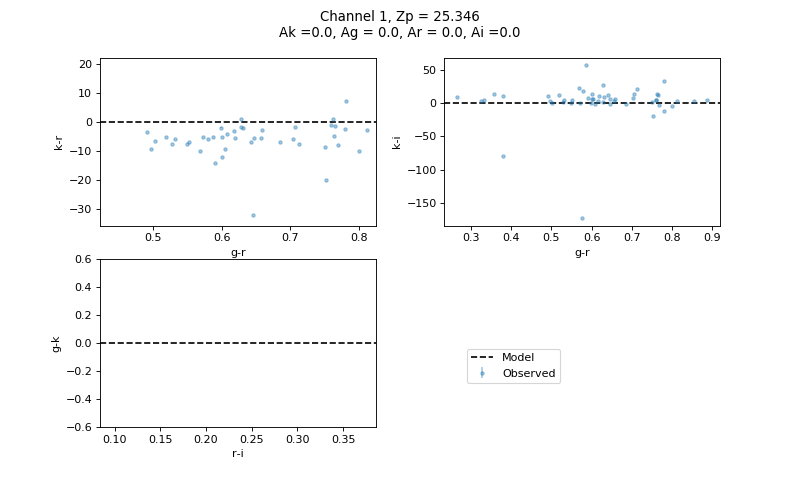

1


In [51]:
#compare = np.array([['g-r','k-r'],['g-r','k-i'],['g-r','r-i'],['r-i','g-k']])
keys = np.array(list(colours.keys()))
compare = np.array([['g-r','k-r'],['g-r','k-i'],['r-i','g-k']])
bds = [(20.4,27)]#,(-0.01,0.01),(-0.01,0.01),(-0.01,0.01),(-0.01,0.01)]
zps = np.zeros(84) * np.nan
for j in range(1):#84):
   # j += 1
    j = 1
    cind =  ((data['campaign'].values == 1) & (data['Channel'].values == j) & (kbe < 100))

    colours = {}
    colours['obs g-r'] = np.array([(gb - rb)[cind], (gbe + rbe)[cind]])
    colours['obs k-i'] = np.array([(kb - ib)[cind], (kbe + ibe)[cind]])
    colours['obs k-r'] = np.array([(kb - rb)[cind], (kbe + rbe)[cind]])
    colours['obs r-i'] = np.array([(rb - ib)[cind], (rbe + ibe)[cind]])
    colours['obs g-k'] = np.array([(gb - kb)[cind], (gbe + kbe)[cind]])
    colours['mod g-r'] = col1[good]
    colours['mod r-i'] = col2[good]
    colours['mod k-r'] = col3[good]
    colours['mod k-i'] = col4[good]
    colours['mod g-k'] = col5[good]
    #print(obs.shape)
    zp0 = 25.4
    Ak0 = Ag0 = Ar0 = Ai0 = 0
    k0 = [zp0]#np.array([zp0,Ak0,Ag0,Ar0,Ai0])
    #nll = lambda *args: -colours_like(*args)
    #res = op.minimize(nll, [25.4, 0, 0,0,0], args=(colours, compare, False))
    res = minimize(SLR_fit_multi,k0,args=(colours,compare,False))
    K0 = res.x
    c = Cut_data(K0,colours,compare)
    res = minimize(SLR_fit_multi,K0,args=(c,compare,False))
    #res = minimize(SLR_fit_multi,k0,args=(colours,compare,True),bounds=bds)
    if len(res.x) < 2:
        zps[j-1] = res.x
    else:
        if cind.any():
            zps[j-1] = res.x[0]
        else:
            zps[j-1] = np.nan
        #print(res.x)

    Plotter(res.x,c,compare,j)
    Plotter(res.x,c,compare,j,Residuals=True,Close=False)
    print(j)

In [40]:
compare = np.array([['g-r','k-r'],['g-r','k-i'],['r-i','g-k']])
#compare = np.array([['g-r','k-r'],['g-r','k-i'],['g-r','r-i'],['r-i','g-k']])
#k0 = np.array([25,Ak0,Ag0,Ar0,Ai0])
k0 = [25.4]#np.array([25.4,Ak0,Ag0,Ar0,Ai0])
bds = [(20.4,27),(-2,2),(-2,2),(-2,2),(-2,2)]
#bds = [(20.4,27),(-0.01,0.01),(-0.01,0.01),(-0.01,0.01),(-0.01,0.01)]
res = minimize(SLR_fit_multi,k0,args=(colours,compare,False))
k = res['x']


In [41]:
res

      fun: -13701.49508045783
 hess_inv: array([[3.55614658e-07]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([25.34581938])

dist (53,)
error (53,)
i:00 mean:-5.454693(5.782315) stdev:41.696868 X2norm:0.000000 Nchanged:0 Nused:53 Nskipped:0
 mean: None  mean_err: None  stdev: None  Nchanged: 52  Nused: 1  Nskipped: 52
ERROR


<IPython.core.display.Javascript object>


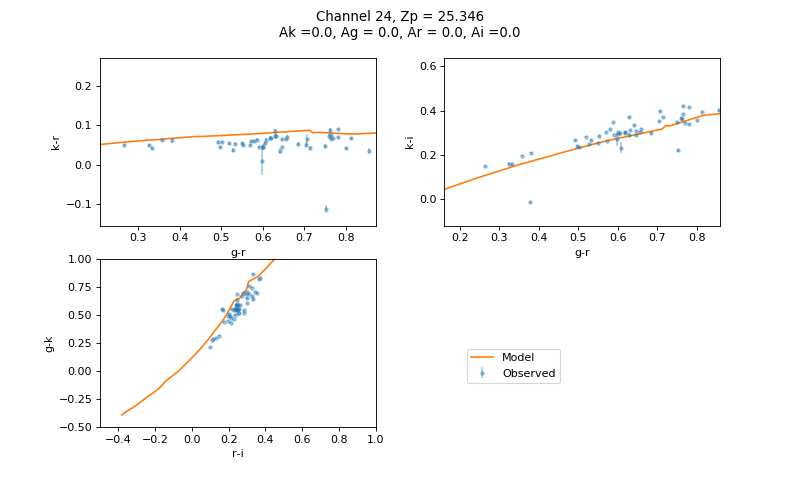

In [42]:
c = Cut_data(k,colours,compare,False)
res2 = minimize(SLR_fit_multi,k,args=(c,compare,False))#,bounds=bds)
Plotter(res2.x,c, compare,24, Close = False)


In [43]:
res.x

array([25.34581938])

In [44]:
res2.x

array([25.34580105])

<IPython.core.display.Javascript object>


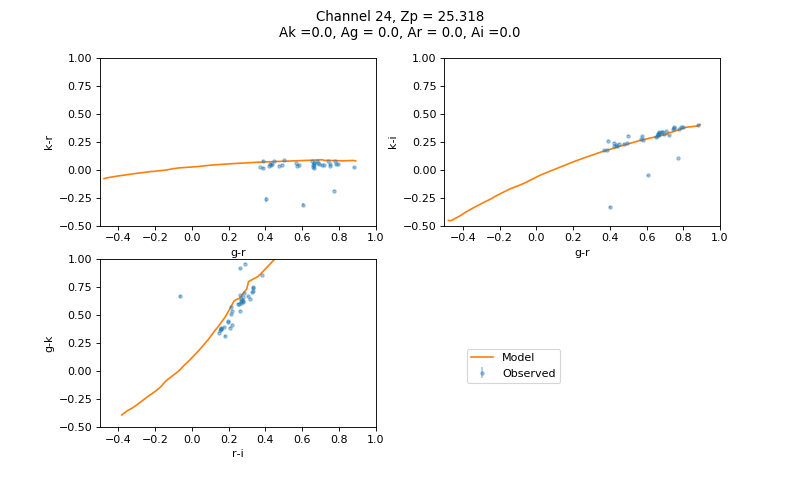

In [25]:
c = colours #Cut_data(k,colours,compare,False)
res2 = minimize(SLR_fit_multi,k,args=(c,compare,False))#,bounds=bds)
Plotter(res2.x,c, compare,24, Close = False)


In [957]:
res2.x - res.x

array([-1.07850809e-03,  2.41722971e-06, -4.85335582e-04,  8.08864045e-04,
       -3.26989502e-04])

<IPython.core.display.Javascript object>


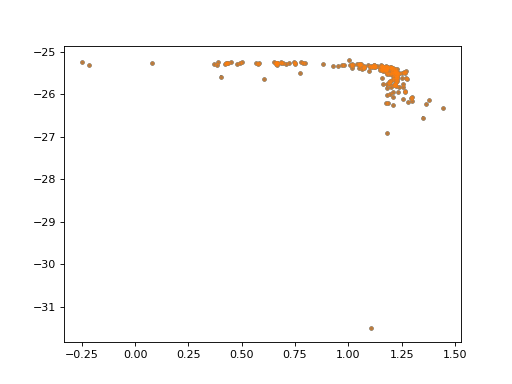

<ErrorbarContainer object of 3 artists>

In [28]:
plt.figure()
plt.errorbar(colours['obs g-r'][0,:],colours['obs k-r'][0,:],yerr=colours['obs k-r'][1,:],fmt='.')
plt.errorbar(c['obs g-r'][0,:],c['obs k-r'][0,:],yerr=c['obs k-r'][1,:],fmt='.',alpha=0.6)
#plt.ylim(-24,-26)
#plt.xlim(0.5,0.9)

In [30]:
Colours = colours
Plot = False
Params = {}
Params['kzp'] = k[0]
Params['Ak'] =0# k[1]
Params['Ag'] = 0#k[2]
Params['Ar'] = 0# k[3]
Params['Ai'] = 0# k[4]

X = 'g-r'; Y = 'k-r'
keys = np.array(list(Colours.keys()))
xind = 'mod ' + X == keys
x = Colours[keys[xind][0]]
yind = 'mod ' + Y == keys
y = Colours[keys[yind][0]]

x_interp = np.arange(np.nanmin(x),0.9,0.01)
inter = interpolate.interp1d(x,y)
l_interp = inter(x_interp)
locus = np.array([x_interp,l_interp])
# observed
xind = 'obs ' + X == keys
x = Colours[keys[xind][0]]
yind = 'obs ' + Y == keys
y = Colours[keys[yind][0]]
#print(X,Y)
c1,c2 = X.split('-')
c3,c4 = Y.split('-')
#print(c1,c2,c3,c4)


# parameters
ob_x = x.copy() 
ob_y = y.copy() 
if X == 'g-r':
    indo = np.where((ob_x[0,:] <= .9) & (ob_x[0,:] >= 0.5))[0]
elif X == 'r-i':
    indo = np.where((ob_x[0,:] <= .5) & (ob_x[0,:] >= 0.1))[0]

ob_x[0,:] += Params['A'+c1] - Params['A'+c2]
if c1 == 'k': ob_x[0,:] += Params['kzp']
if c2 == 'k': ob_x[0,:] -= Params['kzp']


ob_y[0,:] += Params['A'+c3] - Params['A'+c4]
if c3 == 'k': ob_y[0,:] += Params['kzp']
if c4 == 'k': ob_y[0,:] -= Params['kzp']

if X == 'g-r':
    ind = np.where((ob_x[0,:] <= .9) & (ob_x[0,:] >= 0.5))[0]
elif X == 'r-i':
    ind = np.where((ob_x[0,:] <= .5) & (ob_x[0,:] >= 0.1))[0]
ob_x = ob_x[:,ind]
ob_y = ob_y[:,ind]


if Plot:
    plt.figure()
    plt.title(X + ' ' + Y)
    plt.plot(ob_x[0,:],ob_y[0,:],'.')
    plt.plot(locus[0,:],locus[1,:])
#print(ob_x.shape)
dist_tensor = []
dt = []
#print(Y + ' ', ob_y.shape[1])
for i in range(ob_y.shape[1]):
    dist = np.sqrt((ob_x[0,i] - locus[0,:])**2 + (ob_y[0,i] - locus[1,:])**2) 
    dist_tensor += [dist/ ob_y[1,i]]
    dt += [dist]

dist_tensor = np.array(dist_tensor)
dt = np.array(dt)
dt = np.nanmin(abs(dt),axis=1)

In [31]:
dt 

array([0.04710296, 0.04317983, 0.03855201, 0.06033722, 0.01804001,
       0.03389465, 0.06720099, 0.00713557, 0.04277716, 0.02672082,
       0.03363426, 0.03094798, 0.00480102, 0.00446391, 0.05798969,
       0.02439775, 0.26748564, 0.04735997, 0.04273179, 0.03793658,
       0.02503141, 0.39269398, 0.03553999, 0.00263269])

In [32]:
dt.shape

(24,)

In [35]:
bad = []
for i in range(len(dt)):
    if dt[i] > 1:
        bad += [i]
    if dt[i] > 6 * ob_y[1,i]:
        bad += [i]
mask = sigma_mask(dt,ob_y[1])

i:00 mean:0.036738(0.019013) stdev:0.091183 X2norm:0.000000 Nchanged:0 Nused:24 Nskipped:0
i:01 mean:0.037980(0.000741) stdev:0.006424 X2norm:3.231242 Nchanged:14 Nused:10 Nskipped:14
i:02 mean:0.038410(0.000724) stdev:0.006812 X2norm:3.641444 Nchanged:1 Nused:11 Nskipped:13
i:03 mean:0.038410(0.000724) stdev:0.006812 X2norm:3.641444 Nchanged:0 Nused:11 Nskipped:13


<IPython.core.display.Javascript object>


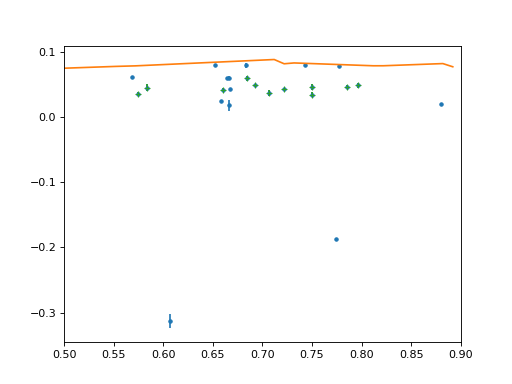

(0.5, 0.9)

In [38]:
plt.figure()
plt.errorbar(ob_x[0,:],ob_y[0,:],yerr = ob_y[1,:],fmt='.')
plt.errorbar(locus[0,:],locus[1,:])
#plt.errorbar(ob_x[0,bad],ob_y[0,bad],yerr = ob_y[1,bad],fmt='.')
plt.errorbar(ob_x[0,mask],ob_y[0,mask],yerr = ob_y[1,mask],fmt='+')
plt.xlim(.5,0.9)

In [982]:
z = zps.copy()
saveit = np.array([np.arange(1,85),z])

In [983]:
np.save('./zeropoints/c01zp.npy',saveit)

In [706]:
z = zps.copy()
z[z==25.4] = np.nan

<IPython.core.display.Javascript object>


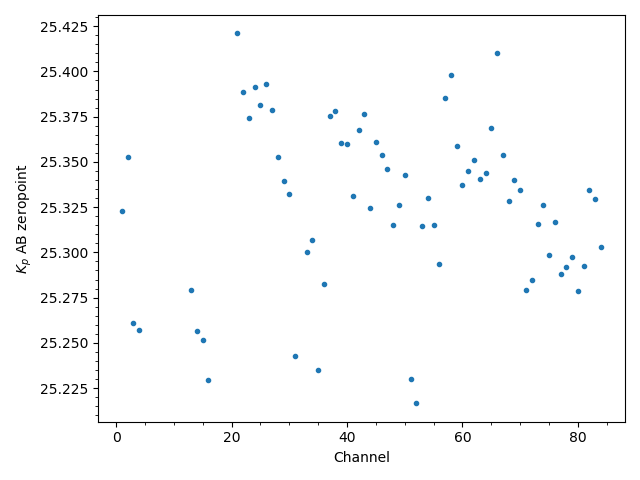

In [722]:
plt.figure()
plt.plot(np.arange(1,85),z,'.')
plt.ylabel('$K_p$ AB zeropoint')
plt.xlabel('Channel')
plt.tight_layout()
plt.minorticks_on()
plt.savefig('C16_zeropoints.png')

<IPython.core.display.Javascript object>


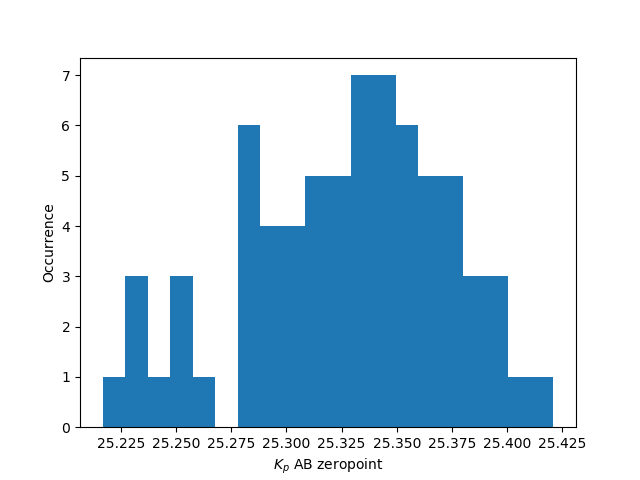

Text(0.5, 0, '$K_p$ AB zeropoint')

In [718]:
plt.figure()
plt.hist(z,bins=20);
plt.ylabel('Occurrence')
plt.xlabel('$K_p$ AB zeropoint')

# examine problem child 

In [11]:
cind =  ((data['campaign'].values == 17) & (data['Channel'].values == 2) & (kbe < 100))

colours = {}
colours['obs g-r'] = np.array([(gb - rb)[cind], (gbe + rbe)[cind]])
colours['obs k-i'] = np.array([(kb - ib)[cind], (kbe + ibe)[cind]])
colours['obs k-r'] = np.array([(kb - rb)[cind], (kbe + rbe)[cind]])
colours['obs r-i'] = np.array([(rb - ib)[cind], (rbe + ibe)[cind]])
colours['obs g-k'] = np.array([(gb - kb)[cind], (gbe + kbe)[cind]])
colours['mod g-r'] = col1[good]
colours['mod r-i'] = col2[good]
colours['mod k-r'] = col3[good]
colours['mod k-i'] = col4[good]
colours['mod g-k'] = col5[good]
#print(obs.shape)
zp0 = 25
Ak0 = Ag0 = Ar0 = Ai0 = 0
k0 = np.array([zp0,Ak0,Ag0,Ar0,Ai0])
bds = [(22,27),(-2,2),(-2,2),(-2,2),(-2,2)]
compare = np.array([['g-r','k-r'],['g-r','k-i'],['r-i','g-k']])

In [12]:
res = minimize(SLR_fit_multi,k0,args=(colours,compare,False),bounds=bds)

In [13]:
res

      fun: -884.7777866797998
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 66.03348766,  66.03348766,  72.05914017, -19.84113851,
         6.55787744])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 576
      nit: 26
   status: 0
  success: True
        x: array([25.24589348,  0.2458935 , -0.09566293, -0.06787241, -0.08235867])

<IPython.core.display.Javascript object>


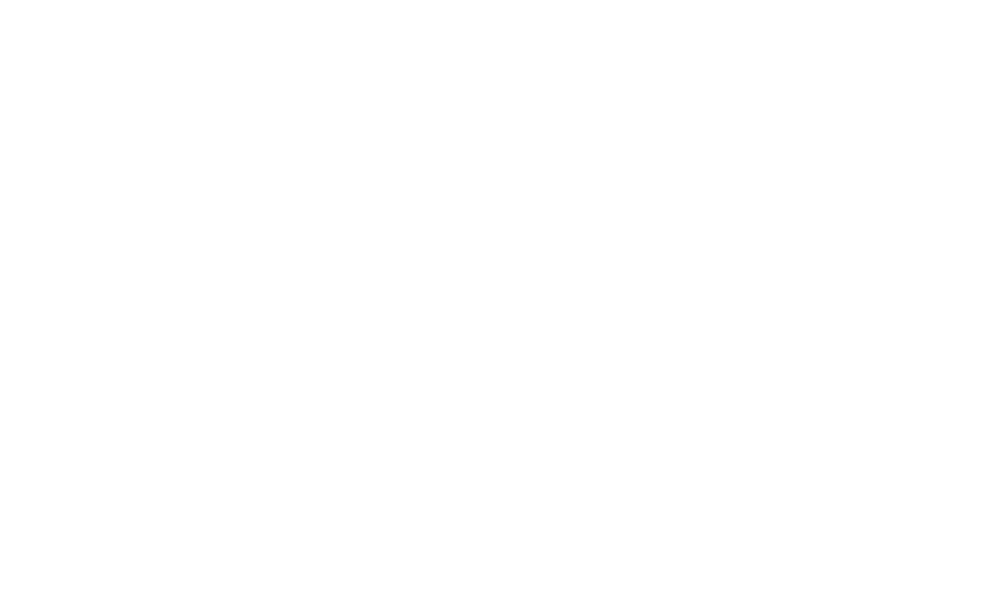

In [194]:
Plotter(res.x,colours,compare,0)

# Actually look at emcee

In [11]:
import emcee

def log_prob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

ndim, nwalkers = 5, 100
ivar = 1. / np.random.rand(ndim)
p0 = np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[ivar])
sampler.run_mcmc(p0, 10000)

State([[ 1.21382567e-03  3.27694503e-01  1.25421517e+00 -4.94235471e-01
   6.43640122e-02]
 [-1.95235704e-01  7.52097673e-01 -6.29425200e-01  8.40922352e-01
  -6.10324909e-01]
 [ 8.88053800e-03  2.37980844e-01  5.63677663e-01  7.03426955e-01
   1.67433148e+00]
 [-2.40656255e-01  2.46310930e-01  4.78533339e-01 -5.79578561e-02
  -1.85785007e-01]
 [-5.33717982e-01  3.79843996e-01  3.21642278e-01 -8.10016072e-03
  -9.15865429e-01]
 [ 2.10110103e-01  2.28627603e-01  4.20788390e-01 -6.32801556e-01
  -4.75534717e-01]
 [-2.55714465e-01 -7.11009688e-02 -4.99856428e-01 -6.61979951e-01
  -2.92528236e-01]
 [-3.68538845e-01  1.14433643e-01  5.83962289e-01  8.74470808e-01
   8.30523521e-01]
 [ 1.29927400e-02  1.72706886e-01  5.86572974e-01  8.48014691e-01
  -5.11230997e-01]
 [-1.74569951e-01 -3.89665582e-01  6.16005576e-01 -2.35990212e-01
   1.10256847e-01]
 [ 3.04081500e-02 -8.66094116e-02  8.55209057e-01  1.89156564e-01
   4.08175495e-01]
 [-2.92280026e-02  5.96940216e-02  5.78380947e-01 -9.639598

In [170]:
def lnlike(theta, x, y, yerr,model):
    if len()
    zp, ak,ag,ar,ai = theta
    y = y + zp #+ ak - ar
    inv_sigma2 = 1.0/(yerr**2 + model**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [195]:
colours['obs g-r'].shape

(2, 279)

In [196]:
x = colours['obs g-r'][0,:]
y = colours['obs k-r'][0,:]
yerr = colours['obs k-r'][1,:]
ind = np.where((0<x) & (x< 0.9))[0]
x = x[ind]; y = y[ind]; yerr = yerr[ind]
m = interpolate.interp1d(colours['mod g-r'],colours['mod k-r'])
model = m(x)

In [172]:
model.shape

(48,)

In [197]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [25.4, 0, 0,0,0], args=(x, y, yerr,model))
zp, ak,ag,ar,ai = result["x"]

In [198]:
zp

25.427898065983506

In [175]:
ar

0.0

In [176]:
def Gauss_prior(Val,Mu,Sig):
    return 1.0/(np.sqrt(2*np.pi)*Sig) *np.exp(-0.5*(Val-Mu)**2/Sig**2)
    

In [994]:
def lnprior(theta):
    if len(theta) > 1:
        zp, Ak, Ag, Ar, Ai = theta
        if not (20 < zp < 30 and -2<Ak<2and -2<Ag<2and -2<Ar<2and -2<Ai<2):
            return -np.inf
    else:
        zp = theta
        if not (20 < zp < 30):
            return -np.inf
        
    #gaussian prior for dust
    mu = 0
    sigma = .1
    pri = (Gauss_prior(Ak,mu,sigma) + Gauss_prior(Ag,mu,sigma) + 
           Gauss_prior(Ar,mu,sigma) + Gauss_prior(Ai,mu,sigma)
          + Gauss_prior(zp,25.4,0.2))
    return np.log(pri)

In [219]:
def lnprob(theta, x, y, yerr,model):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr,model)

In [220]:
import emcee
ndim, nwalkers = 5, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr,model))
sampler.run_mcmc(pos, 1000);

<IPython.core.display.Javascript object>


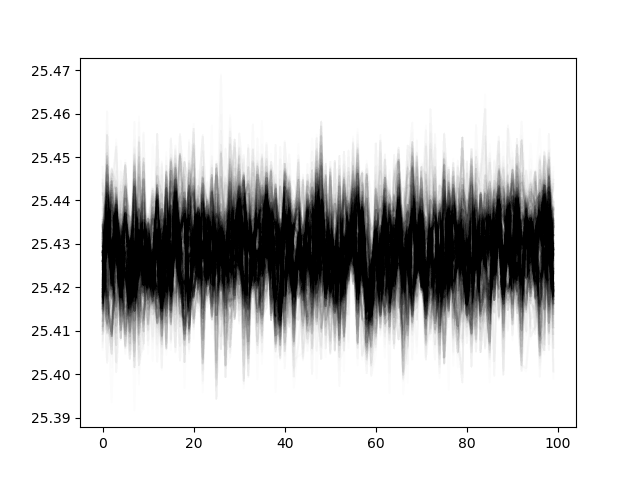

<IPython.core.display.Javascript object>


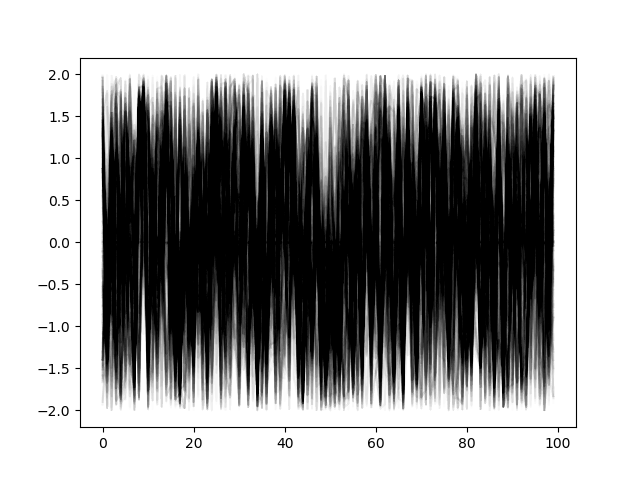

In [224]:
plt.figure()
plt.plot(sampler.chain[:,:,0],'k',alpha=0.01);
plt.figure()
plt.plot(sampler.chain[:,:,1],'k',alpha=0.01);
#plt.ylim(-1,1);

In [225]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [240]:
samples.shape

(95000, 5)

<IPython.core.display.Javascript object>


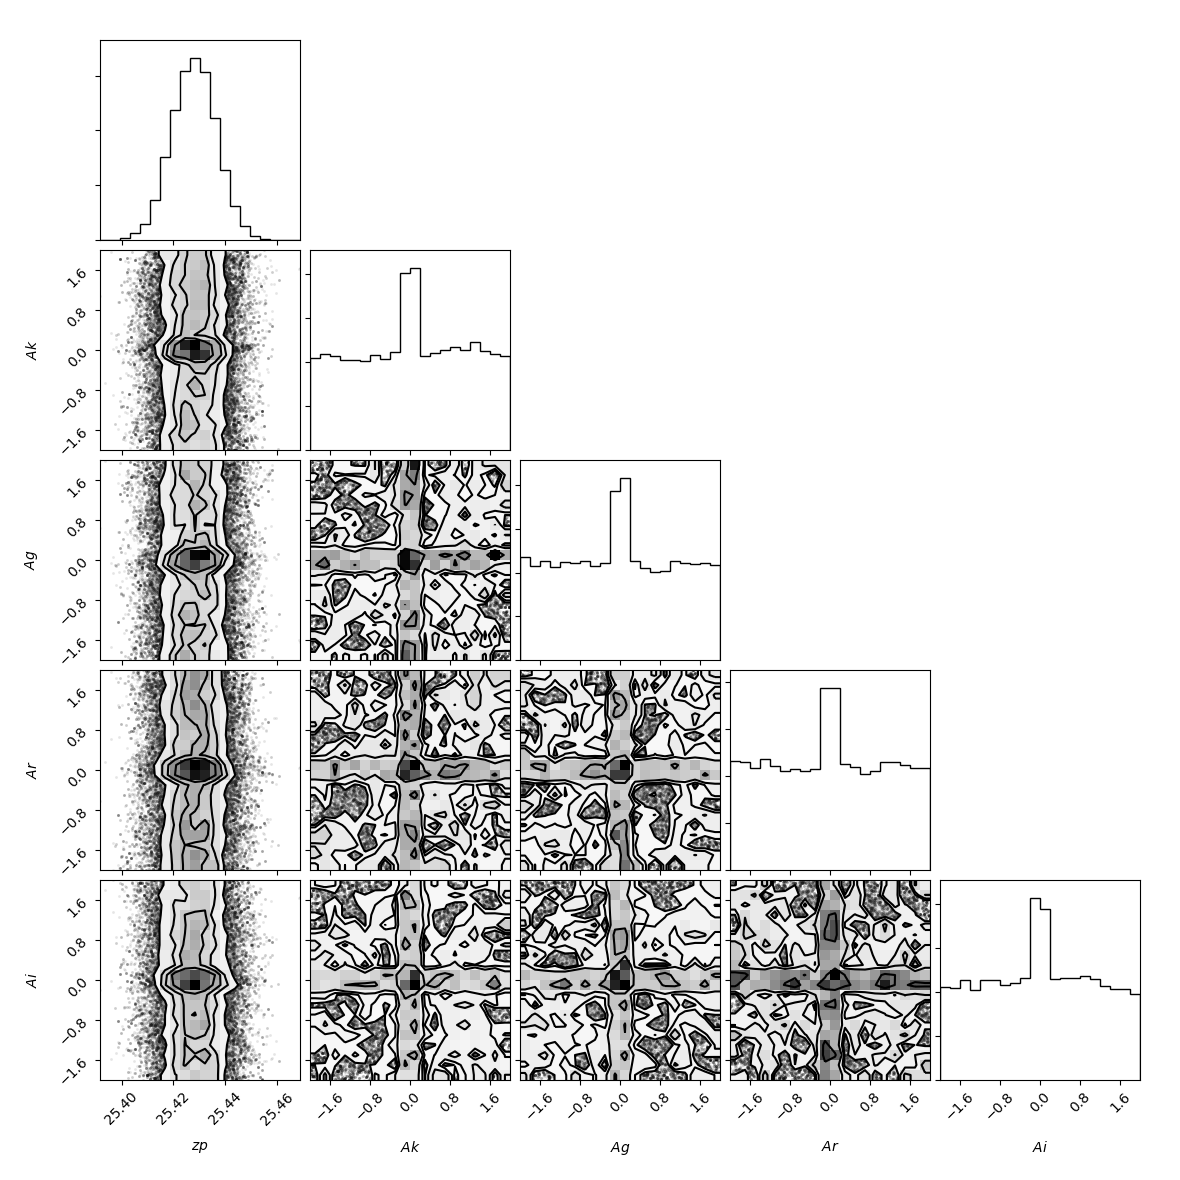

In [226]:
import corner
fig = corner.corner(samples, labels=["$zp$", "$Ak$" , "$Ag$", "$Ar$", "$Ai$"])#,truths=[m_true, b_true, np.log(f_true)])
#fig.savefig("triangle.png")

<IPython.core.display.Javascript object>


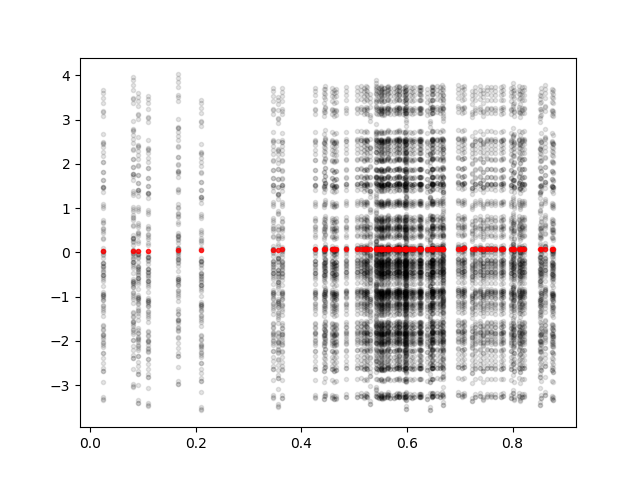

In [206]:
plt.figure()
for zp, Ak, Ag, Ar, Ai in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(x, y+zp+Ak-Ar,"k.", alpha=0.1)
plt.plot(x, model,"r.", lw=2, alpha=0.8)
#plt.errorbar(x, y+zp+Ak-Ar, yerr=yerr, fmt=".k")

In [227]:
samples[:, 2] = np.exp(samples[:, 2])
zp_mcmc, Ak_mcmc, Ag_mcmc, Ar_mcmc, Ai_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [228]:
zp_mcmc

(25.428057021412258, 0.008534492891730139, 0.008607166678626044)

In [128]:
Ak_mcmc

(-0.024976639449579036, 3.318197900067586, 3.080111714728269)

In [132]:
samples.shape

(145000, 5)

In [133]:
np.nanmedian(samples[:,0])

25.353411748781248

In [134]:
np.nanstd(samples[:,0])

3.2013472697440064

# make work for milti-filter fitting

In [ ]:
def Fit_data(K,X,Y,Colours):
    Params = {}
    Params['kzp'] = K[0]
    Params['Ak'] = K[1]
    Params['Ag'] = K[2]
    Params['Ar'] = K[3]
    Params['Ai'] = K[4]
    keys = np.array(list(Colours.keys()))
    # models
    xind = 'mod ' + X == keys
    mod_x = Colours[keys[xind][0]]
    yind = 'mod ' + Y == keys
    mod_y = Colours[keys[yind][0]]
    
    
    # observed
    xind = 'obs ' + X == keys
    x = Colours[keys[xind][0]]
    yind = 'obs ' + Y == keys
    y = Colours[keys[yind][0]]
    #print(X,Y)
    c1,c2 = X.split('-')
    c3,c4 = Y.split('-')
    #print(c1,c2,c3,c4)
    
    # parameters
    ob_x = x.copy() 
    ob_x[0,:] += Params['A'+c1] - Params['A'+c2]
    if c1 == 'k': ob_x += Params['kzp']
    if c2 == 'k': ob_x -= Params['kzp']

    ob_y = y.copy() 
    ob_y[0,:] += Params['A'+c3] - Params['A'+c4]
    if c3 == 'k': ob_y[0,:] += Params['kzp']
    if c4 == 'k': ob_y[0,:] -= Params['kzp']
    
    ind = np.where((ob_x[0,:] <= .9) & (ob_x[0,:] >= 0.5))[0]
    ob_x = ob_x[:,ind]
    ob_y = ob_y[:,ind]
    
    inter = interpolate.interp1d(mod_x,mod_y)
    model = inter(ob_x)
    x = ob_x[:,0]
    y = ob_y[:,0]
    yerr = ob_x[:,1]
    return x, y, yerr, model

In [ ]:
Dist_tensor()

In [1030]:
def lnprior(theta):
    if len(theta) ==5:
        zp, Ak, Ag, Ar, Ai = theta
        if not (20 < zp < 30 and -2<Ak<2and -2<Ag<2and -2<Ar<2and -2<Ai<2):
            return -np.inf
        else:
            return 0
    else:
        zp = theta
        if not (20 < zp < 30):
            return -np.inf
        else:
            return 0


def colours_like(K, Colours, Compare,Second):
    residual = SLR_fit_multi(K,Colours,Compare,Second)
    return -residual

def lnprob(theta, Colours, Compare,Second):
    lp = lnprior(theta)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp + colours_like(theta, Colours, Compare,Second)

In [448]:
nll = lambda *args: -colours_like(*args)
compare = np.array([['g-r','k-r'],['g-r','k-i'],['r-i','g-k']])
result = op.minimize(nll, [25.4, 0, 0,0,0], args=(colours, compare, True))

In [449]:
result

      fun: inf
 hess_inv: array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])
      jac: array([nan, nan, nan, nan, nan])
  message: 'NaN result encountered.'
     nfev: 7
      nit: 0
     njev: 1
   status: 3
  success: False
        x: array([25.4,  0. ,  0. ,  0. ,  0. ])

In [444]:
result['x']

array([25.4,  0. ,  0. ,  0. ,  0. ])

In [1003]:
compare = np.array([['g-r','k-r'],['g-r','k-i'],['r-i','g-k']])
#compare = np.array([['g-r','k-r'],['g-r','k-i'],['g-r','r-i'],['r-i','g-k']])
#k0 = np.array([25,Ak0,Ag0,Ar0,Ai0])
k0 = np.array([25.4])
#bds = [(20.4,27),(-2,2),(-2,2),(-2,2),(-2,2)]
#bds = [(20.4,27),(-0.01,0.01),(-0.01,0.01),(-0.01,0.01),(-0.01,0.01)]
res = minimize(SLR_fit_multi,k0,args=(colours,compare,False))
k = res['x']
c = Cut_data(k,colours,compare,False)
res2 = minimize(SLR_fit_multi,k,args=(c,compare,False))
k = res.x

{'kzp': 25.376106715800102, 'Ak': 0.0, 'Ag': 0.0, 'Ar': 0.0, 'Ai': 0.0}


<IPython.core.display.Javascript object>


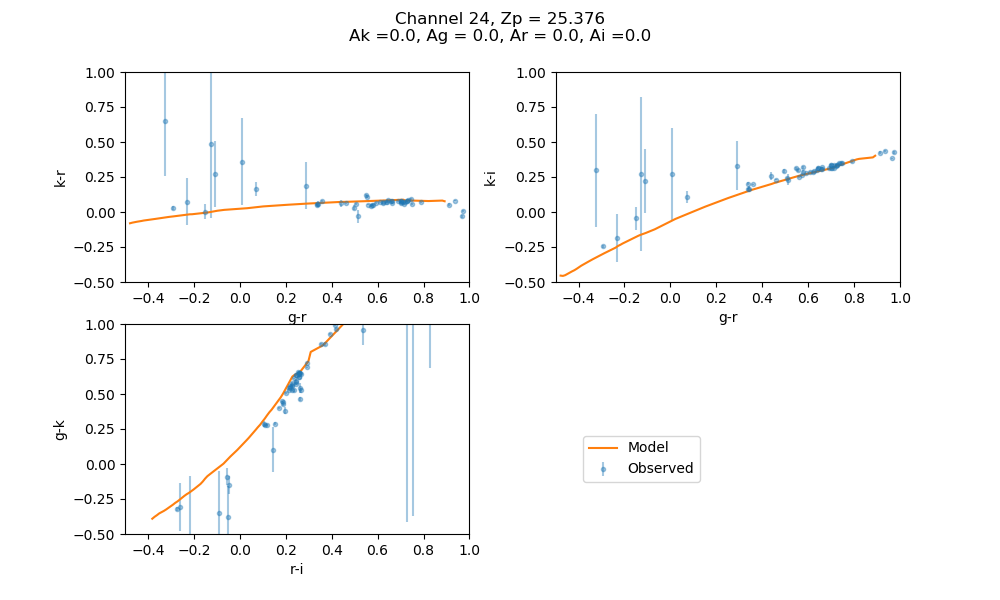

In [1008]:
Plotter(res.x,c, compare,24, Close = False)

In [1142]:
import emcee
k = res.x
compare = np.array([['g-r','k-r'],['g-r','k-i'],['r-i','g-k']])
ndim, nwalkers = 1, 100
pos = [k + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(colours, compare,False))
sampler.run_mcmc(pos, 1000);


In [ ]:
samples.

<IPython.core.display.Javascript object>


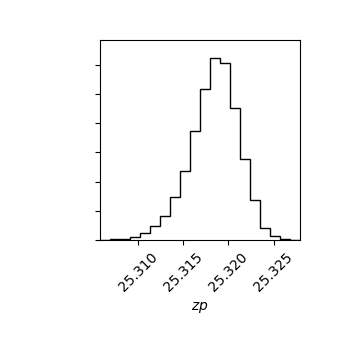

In [1143]:
samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$zp$"])

In [1033]:
#samples[:, 2] = np.exp(samples[:, 2])
zp_mcmc, Ak_mcmc, Ag_mcmc, Ar_mcmc, Ai_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

ValueError: not enough values to unpack (expected 5, got 1)

In [1043]:
np.nanstd(samples)

0.0010565038071713596

In [1144]:
np.nanmean(samples)

25.318417922136543

In [1141]:
k

array([25.34805574])

In [626]:
k = np.nanmean(samples,axis=0)

In [625]:
zp_mcmc

(25.354556152010865, 1.1337223326322743, 1.0570009175853663)

<IPython.core.display.Javascript object>


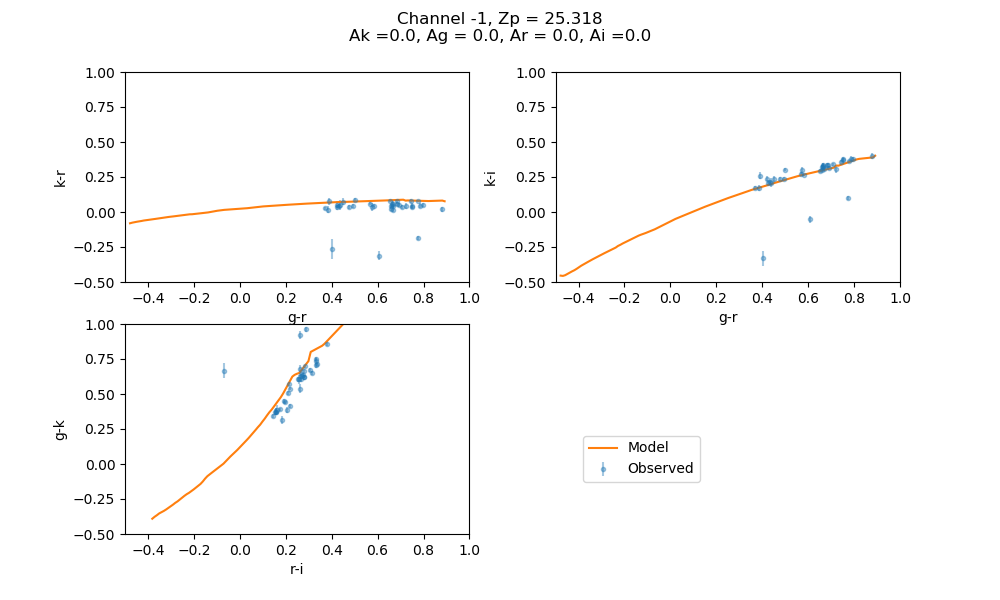

In [1146]:
#k = result['x']
Plotter([np.nanmean(samples)],colours, compare,-1,Close=False,Residuals=False)

In [283]:
Ak_mcmc

(-0.06533639115842493, 0.8754612354600005, 1.0215479226222715)

In [291]:
def Dot_prod_error(x,y,Model):
    """
    Calculate the error projection in the direction of a selected point.
    """
    adj = y[:,0] - Model[:,1]
    op = y[:,0] - Model[:,0]
    hyp = np.sqrt(adj**2 + op**2)
    costheta = adj / hyp
    yerr_proj = y[:,1] * costheta
    xerr_proj = x[:,1] * costheta
    
    proj_err = yerr_proj + xerr_proj
    
    return proj_err